**Import Library and Package**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import pandas as pd
# import torch
# from torch import nn
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
from tqdm import tqdm
tqdm.pandas()

In [ ]:
#General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Model(ML)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

#Framework (DL)
import torch
from torch import nn

# Evaluation
from sklearn.metrics import classification_report # (Actual , prediction)
from sklearn.metrics import accuracy_score # (Actual , Prediction)
from sklearn.metrics import mean_absolute_error as mae #(y_true, y_pred)
from sklearn.metrics import mean_squared_error as mse #(y_true, y_pred)
from sklearn.metrics import r2_score # (y_true, y_pred)

# Imputation
from sklearn.impute import SimpleImputer

#Dataset
from sklearn.datasets import make_circles

In [ ]:
!pip install demoji

**Road The Dataset**

In [ ]:
df = pd.read_csv('/content/Scrapped_Car_Reviews_Toyota.csv', quotechar='"', engine='python')
df.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 02/02/17 19:53 PM (PST),Ricardo,1997 Toyota Previa Minivan LE 3dr Minivan,"great vehicle, Toyota best design ever. thank you","there is no way back, enjoy what you have .",5.000
1,1,on 12/17/16 16:40 PM (PST),matt,1997 Toyota Previa Minivan LE All-Trac 3dr Min...,"my 4th previa, best van ever made!",1st 95 went over 300k before being totalled b...,5.000
2,2,on 04/14/10 07:43 AM (PDT),Joel G,1997 Toyota Previa Minivan LE 3dr Minivan,Mom's Taxi Babies Ride,Sold 86 Toyota Van 285K miles to be replaced ...,5.000
3,3,on 11/12/08 17:31 PM (PST),Dennis,1997 Toyota Previa Minivan LE All-Trac 3dr Min...,My Favorite Van Ever,"I have owned lots of vans, and the Previa is ...",4.875
4,4,on 04/14/08 22:47 PM (PDT),Alf Skrastins,1997 Toyota Previa Minivan LE All-Trac 3dr Min...,Best Minivan ever,My 1997 AWD Previa is the third one that I ha...,5.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22684 non-null  object 
 1   Review_Date    19537 non-null  object 
 2   Author_Name    18747 non-null  object 
 3   Vehicle_Title  18747 non-null  object 
 4   Review_Title   18745 non-null  object 
 5   Review         18747 non-null  object 
 6   Rating         17957 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


In [ ]:
df.shape

(22702, 7)

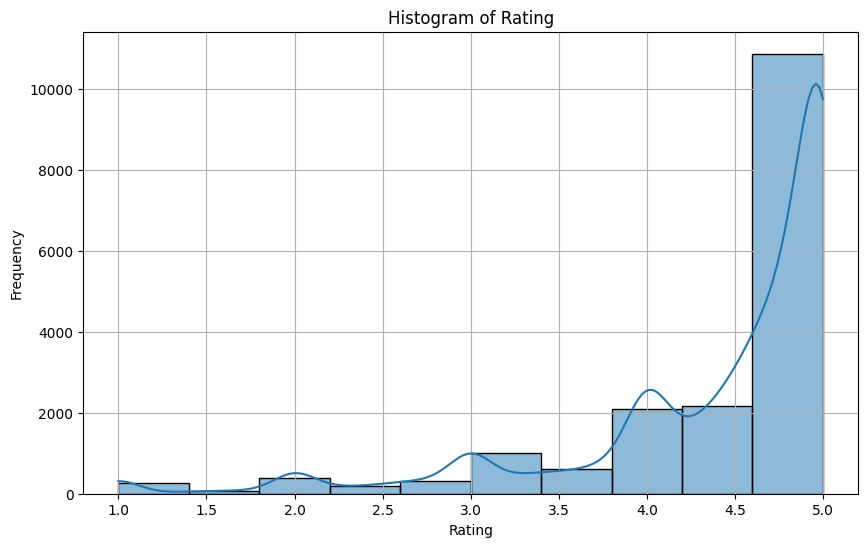

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms using seaborn
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

<Figure size 2500x2000 with 0 Axes>

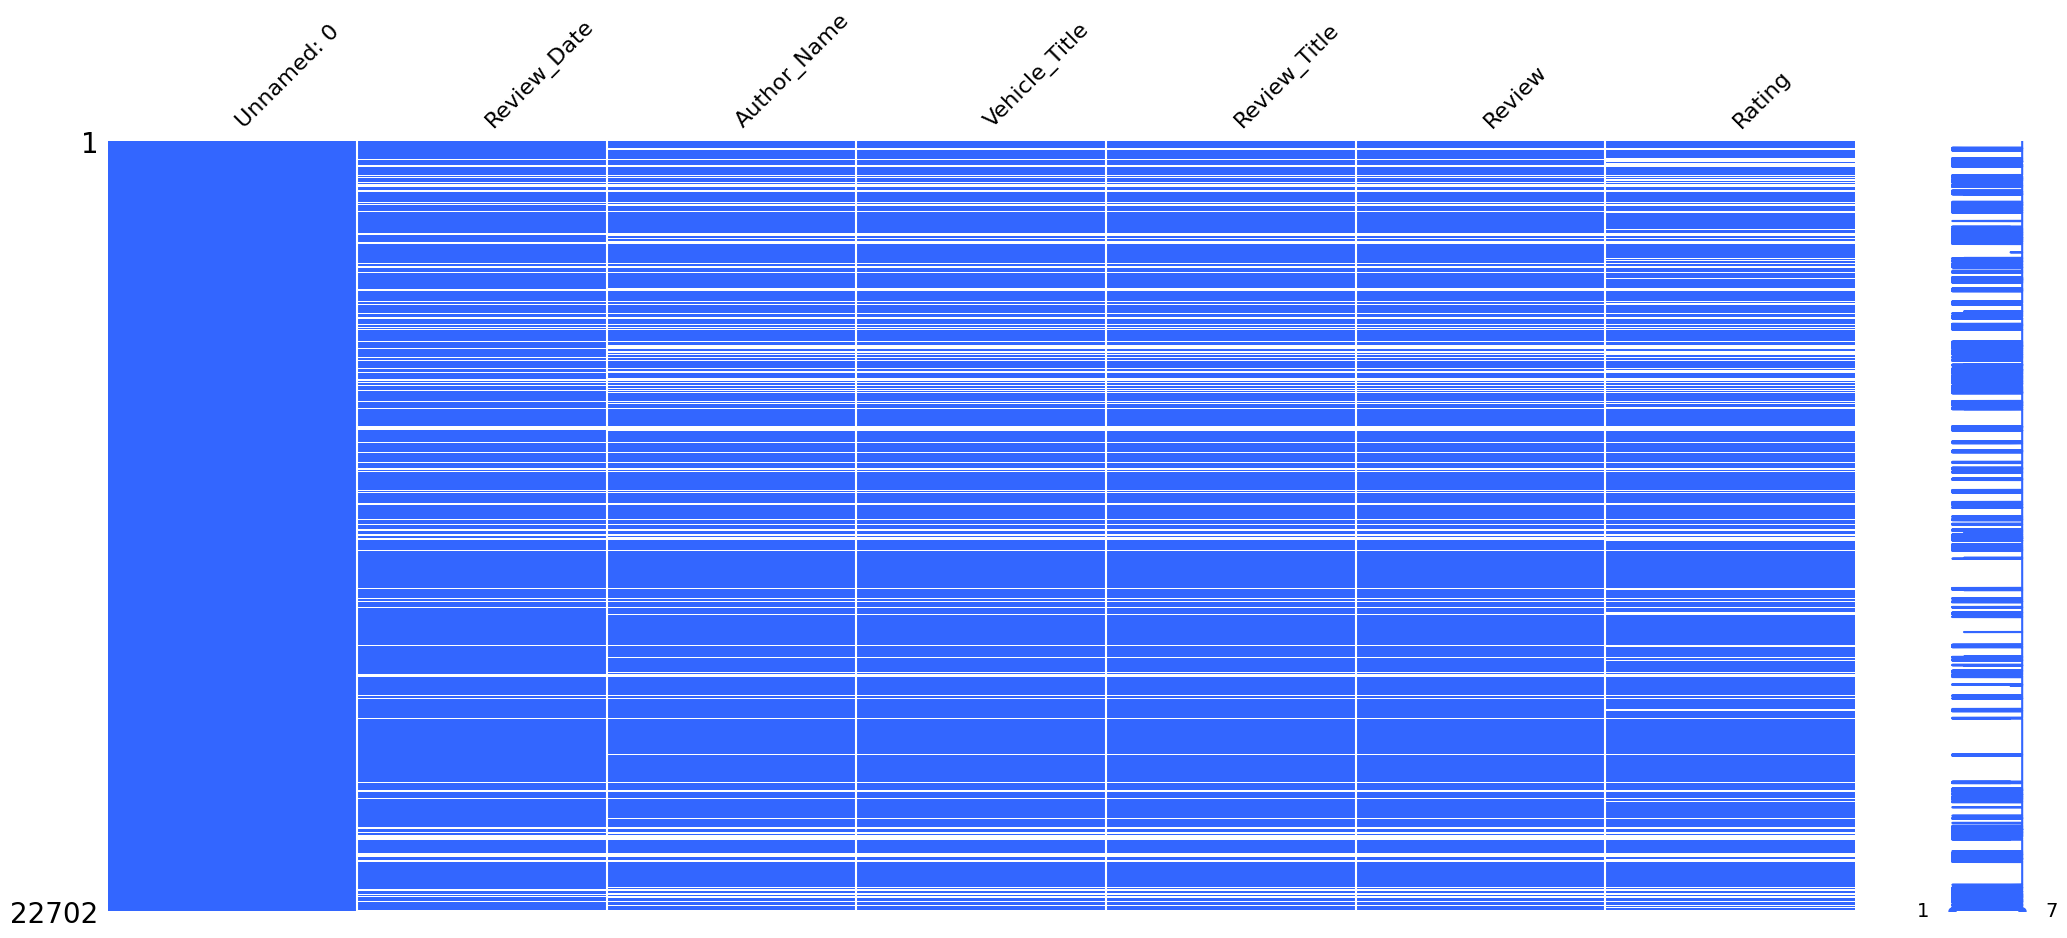

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df.isnull().sum()

Unnamed: 0         18
Review_Date      3165
Author_Name      3955
Vehicle_Title    3955
Review_Title     3957
Review           3955
Rating           4745
dtype: int64

In [ ]:
df["Review"]  = df["Review_Title"] + df["Review"]

In [ ]:
df.drop(["Unnamed: 0","Review_Date","Author_Name","Vehicle_Title" , "Review_Title"] , axis = 1 , inplace = True)
df.dropna( inplace = True)

In [ ]:
df.head()

,Review,Rating
0,"great vehicle, Toyota best design ever. thank ...",5.000
1,"my 4th previa, best van ever made! 1st 95 went...",5.000
2,Mom's Taxi Babies Ride Sold 86 Toyota Van 285K...,5.000
3,My Favorite Van Ever I have owned lots of vans...,4.875
4,Best Minivan ever My 1997 AWD Previa is the th...,5.000


<Figure size 2500x2000 with 0 Axes>

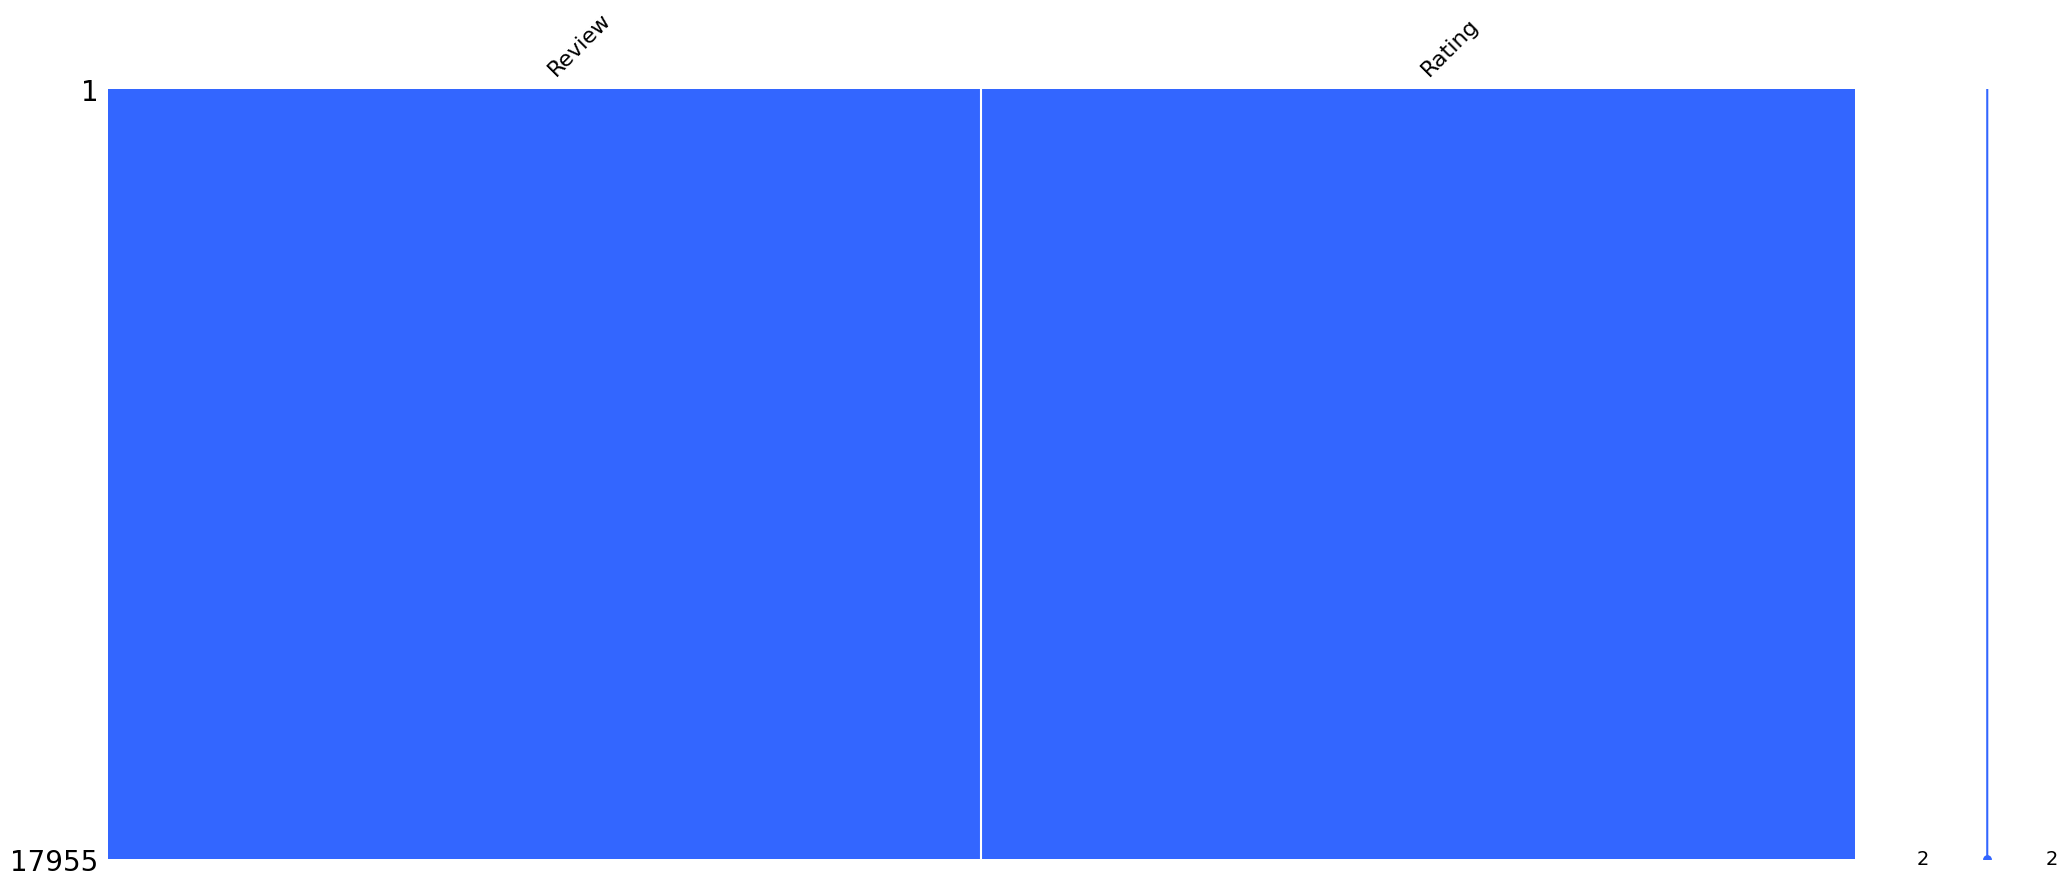

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df2 = df.copy()

**Pre-Processing**

In [ ]:
import re
import spacy
import demoji
import unicodedata as uni
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
nltk.download('stopwords')

sp = spacy.load("en_core_web_sm")
en_stopwords = set(stopwords.words('english'))

def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string

def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text

# en_stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocessing(text):

    if not isinstance(text, str):  # Check if text is a string
        text = str(text)
    text = remove_url(text)
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [ ]:
import re
import unicodedata as uni
import spacy

sp = spacy.load("en_core_web_sm")


def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    # text = lemmatization( text)
    return text

def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    # text = " ".join(text)
    # token = sp(text)
    # text = [word.lemma_ for word in token]
    # return text
    doc = sp(text)
    text = [token.lemma_ for token in doc]
    return " ".join(text)

In [ ]:
honda = df2.copy()

In [ ]:
honda.head()

,Review,Rating
0,"great vehicle, Toyota best design ever. thank ...",5.000
1,"my 4th previa, best van ever made! 1st 95 went...",5.000
2,Mom's Taxi Babies Ride Sold 86 Toyota Van 285K...,5.000
3,My Favorite Van Ever I have owned lots of vans...,4.875
4,Best Minivan ever My 1997 AWD Previa is the th...,5.000


In [ ]:
honda['cleaned_Review'] = honda['Review'].progress_map(clean_text)
honda.drop("Review" , axis = 1 , inplace = True)

rating_above_two  = honda["Rating"] >= 3.5
honda.loc[  rating_above_two, "Rating"] = 1
honda.loc[ ~rating_above_two , "Rating"] = 0

honda.head()

100%|██████████| 17955/17955 [00:01<00:00, 10863.42it/s]


,Rating,cleaned_Review
0,1.0,great vehicle toyota best design ever thank yo...
1,1.0,my th previa best van ever made st went over k...
2,1.0,moms taxi babies ride sold toyota van k miles ...
3,1.0,my favorite van ever i have owned lots of vans...
4,1.0,best minivan ever my awd previa is the third o...


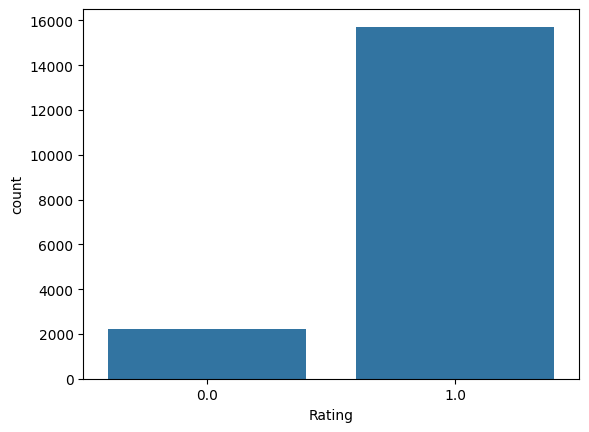

In [ ]:
import seaborn as sns

sns.countplot(x = "Rating", data = honda)
plt.show()

#**Models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming the dataset has two columns: 'review' and 'sentiment'
X_lr = honda['cleaned_Review']  # Features
y_lr = honda['Rating']  # Target

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Vectorize the tokenized reviews using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf_lr = vectorizer.fit_transform(X_train_lr)
# print(X_train_tfidf)
X_test_tfidf_lr = vectorizer.transform(X_test_lr)

# Choose and train a model (Logistic Regression in this case)


In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf_lr, y_train_lr)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_tfidf_lr)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_lr, y_pred_lr)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test_lr, y_pred_lr))

Accuracy: 0.8972431077694235
              precision    recall  f1-score   support

         0.0       0.75      0.33      0.45       471
         1.0       0.91      0.98      0.94      3120

    accuracy                           0.90      3591
   macro avg       0.83      0.66      0.70      3591
weighted avg       0.89      0.90      0.88      3591



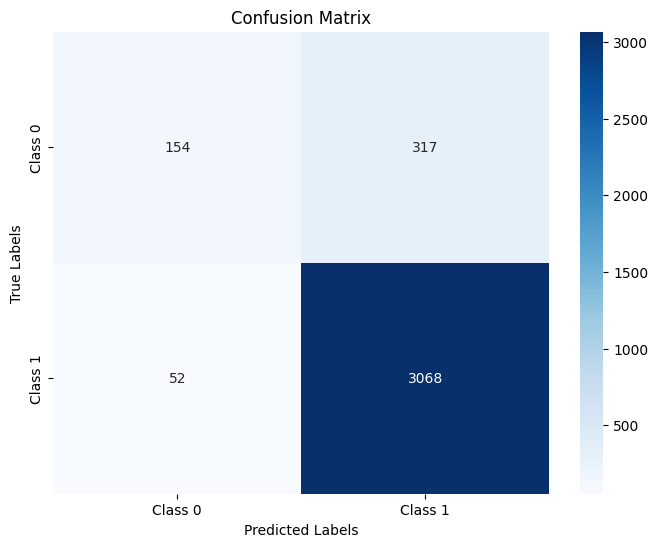

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

cm = confusion_matrix(y_test_lr, y_pred_lr)
# cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
# cmd.plot()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
keywords = ["engine", "service", "fuel", "price", "design"]

In [ ]:
def detect_keywords_and_predict_sentiment(input_text, keywords, vectorizer, model):
    # Clean and lemmatize the input text
    cleaned_text = clean_text(input_text)
    # lemmatized_text = lemmatization(cleaned_text)
    # print(lemmatized_text)
    lemmatized_text = cleaned_text

        # Check for presence of keywords
    detected_keywords = [word for word in keywords if word in lemmatized_text]

    # Predict sentiment
    input_vector = vectorizer.transform([lemmatized_text])
    sentiment = model.predict(input_vector)
    sentiment_label = "Positive" if sentiment == 1 else "Negative"

    return detected_keywords, sentiment_label

In [ ]:
# Example user input
user_input = "The engine performance is great, but the fuel consumption is high."

# Detect keywords and predict sentiment
detected_keywords, sentiment_label = detect_keywords_and_predict_sentiment(user_input, keywords, vectorizer, model_lr)

print(f"The reviewer is talking '{sentiment_label}' about the {detected_keywords} of the vehicle in his/her comment")


The reviewer is talking 'Positive' about the ['engine', 'fuel'] of the vehicle in his/her comment


In [ ]:
# Example user input
user_input = "The engine performance is worst, but the fuel consumption is high."

# Detect keywords and predict sentiment
detected_keywords, sentiment_label = detect_keywords_and_predict_sentiment(user_input, keywords, vectorizer, model_lr)

print(f"The reviewer is talking '{sentiment_label}' about the {detected_keywords} of the vehicle in his/her comment")


The reviewer is talking 'Negative' about the ['engine', 'fuel'] of the vehicle in his/her comment


In [ ]:
honda.head()

,Rating,cleaned_Review
0,1.0,great vehicle toyota best design ever thank yo...
1,1.0,my th previa best van ever made st went over k...
2,1.0,moms taxi babies ride sold toyota van k miles ...
3,1.0,my favorite van ever i have owned lots of vans...
4,1.0,best minivan ever my awd previa is the third o...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_aspects(text):
    doc = nlp(text)
    aspects = [chunk.text for chunk in doc.noun_chunks]
    return aspects

honda['Aspects'] = honda['cleaned_Review'].progress_map(extract_aspects)  # Check the extracted aspects

100%|██████████| 17955/17955 [08:20<00:00, 35.85it/s]


In [ ]:
honda['Aspects'].head()

0    [great vehicle toyota best design, you, no way...
1    [my th previa, van, st, a truck, a red light, ...
2    [toyota van k miles, previa, st baby, jun, nd ...
3    [i, lots, vans, the previa, the best van, i, b...
4    [best minivan, ever my awd previa, the third o...
Name: Aspects, dtype: object

In [ ]:
honda.head()

,Rating,cleaned_Review
0,1.0,great vehicle toyota best design ever thank yo...
1,1.0,my th previa best van ever made st went over k...
2,1.0,moms taxi babies ride sold toyota van k miles ...
3,1.0,my favorite van ever i have owned lots of vans...
4,1.0,best minivan ever my awd previa is the third o...


**SVM Model evaluation**

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(honda['cleaned_Review']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Split data for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
# y_test_svm = y_train_lr
# Support Vector Machine
vectorizer = TfidfVectorizer()
X_train_tfidf_svm = vectorizer.fit_transform(X_train_svm)
# print(X_train_tfidf)
X_test_tfidf_svm = vectorizer.transform(X_test_svm)



In [ ]:
svc = SVC()
svc.fit(X_train_tfidf_svm, y_train_svm)
y_pred_svm = svc.predict(X_test_tfidf_svm)
print(classification_report(y_test_svm, y_pred_svm))
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

         0.0       0.77      0.35      0.48       471
         1.0       0.91      0.98      0.95      3120

    accuracy                           0.90      3591
   macro avg       0.84      0.67      0.71      3591
weighted avg       0.89      0.90      0.88      3591

Accuracy: 0.9011417432470064


In [ ]:
# Example user input
user_input = "The engine performance is great, but the fuel consumption is high."

# Detect keywords and predict sentiment
detected_keywords, sentiment_label = detect_keywords_and_predict_sentiment(user_input, keywords, vectorizer, svc)

print(f"The reviewer is talking {sentiment_label} about the {detected_keywords} of the vehicle in his/her comment")


The reviewer is talking Positive about the ['engine', 'fuel'] of the vehicle in his/her comment


**LSTM**

In [ ]:
# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(honda['cleaned_Review'])
X_seq = tokenizer.texts_to_sequences(honda['cleaned_Review'])
X_pad = pad_sequences(X_seq, maxlen=200)

# Split data for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, honda['Rating'], test_size=0.2, random_state=42)

In [ ]:
# Example of LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

Epoch 1/5
225/225 - 192s - loss: 0.3331 - accuracy: 0.8806 - val_loss: 0.2599 - val_accuracy: 0.8861 - 192s/epoch - 851ms/step
Epoch 2/5
225/225 - 160s - loss: 0.2228 - accuracy: 0.9086 - val_loss: 0.3507 - val_accuracy: 0.8978 - 160s/epoch - 710ms/step
Epoch 3/5
225/225 - 163s - loss: 0.1792 - accuracy: 0.9288 - val_loss: 0.2549 - val_accuracy: 0.9064 - 163s/epoch - 724ms/step
Epoch 4/5
225/225 - 166s - loss: 0.1416 - accuracy: 0.9472 - val_loss: 0.2702 - val_accuracy: 0.8911 - 166s/epoch - 737ms/step
Epoch 5/5
225/225 - 169s - loss: 0.1085 - accuracy: 0.9626 - val_loss: 0.2954 - val_accuracy: 0.9006 - 169s/epoch - 750ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

# Predict on the test set
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Convert predictions to 1D array
y_pred_lstm = y_pred_lstm.reshape(-1)

# Accuracy
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print(f'Accuracy (LSTM): {accuracy_lstm:.4f}')

# Precision, Recall, F1-Score
precision_lstm = precision_score(y_test_lstm, y_pred_lstm) # Now precision_score is defined
recall_lstm = recall_score(y_test_lstm, y_pred_lstm)
f1_lstm = f1_score(y_test_lstm, y_pred_lstm)

print(f'Precision (LSTM): {precision_lstm:.4f}')
print(f'Recall (LSTM): {recall_lstm:.4f}')
print(f'F1-Score (LSTM): {f1_lstm:.4f}')

# Detailed classification report
print(classification_report(y_test_lstm, y_pred_lstm))



113/113 [==============================] - 8s 68ms/step
Accuracy (LSTM): 0.9006
Precision (LSTM): 0.9257
Recall (LSTM): 0.9628
F1-Score (LSTM): 0.9439
              precision    recall  f1-score   support

         0.0       0.66      0.49      0.56       471
         1.0       0.93      0.96      0.94      3120

    accuracy                           0.90      3591
   macro avg       0.80      0.73      0.75      3591
weighted avg       0.89      0.90      0.89      3591



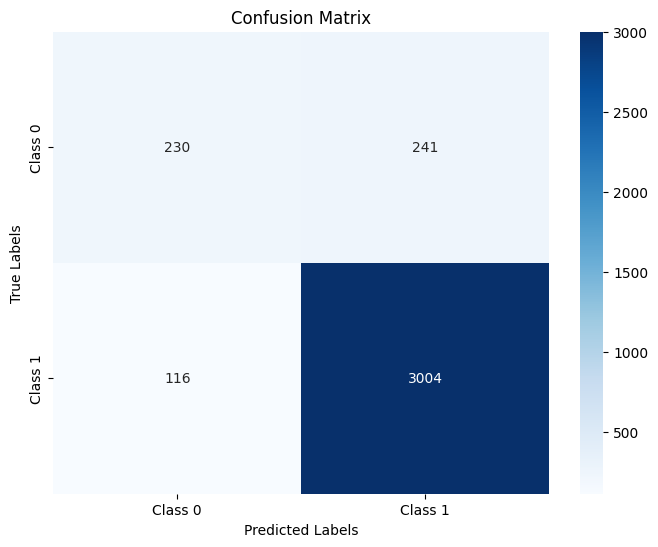

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_lstm, y_pred_lstm)
# cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
# cmd.plot()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model and capture the history
history = model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

# Check available keys in history
print(history.history.keys())


Epoch 1/5
225/225 - 181s - loss: 0.0927 - accuracy: 0.9687 - val_loss: 0.3045 - val_accuracy: 0.8947 - 181s/epoch - 806ms/step
Epoch 2/5
225/225 - 160s - loss: 0.0715 - accuracy: 0.9765 - val_loss: 0.3493 - val_accuracy: 0.8978 - 160s/epoch - 711ms/step
Epoch 3/5
225/225 - 169s - loss: 0.0673 - accuracy: 0.9782 - val_loss: 0.3940 - val_accuracy: 0.8864 - 169s/epoch - 752ms/step
Epoch 4/5
225/225 - 164s - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.4122 - val_accuracy: 0.8864 - 164s/epoch - 727ms/step
Epoch 5/5
225/225 - 164s - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.4961 - val_accuracy: 0.8931 - 164s/epoch - 731ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


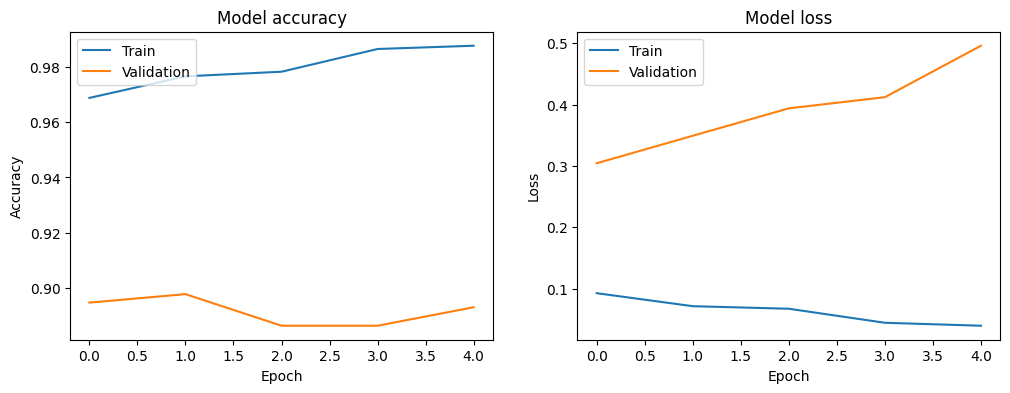

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Check if 'accuracy' and 'val_accuracy' keys exist
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

# Check if 'loss' and 'val_loss' keys exist
if 'loss' in history.history and 'val_loss' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()